Suppose you work for a landscaping company, and they want to advertise their service online. They create an ad and sit back waiting for the money to roll in. On the first day, the ad sends 100 visitors to the site and 14 of them sign up for landscaping services. Create a generative model to come up with the posterior distribution and produce a visualization of what the posterior distribution would look like given the observed data.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [98]:
prior = np.random.uniform(0,1,100_000)

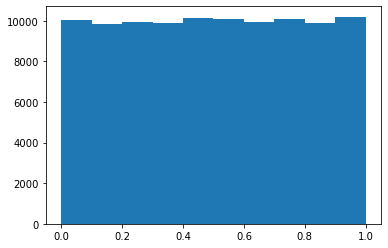

In [99]:
plt.hist(prior);

In [26]:
def generative_model(n_visits, probability):
    return np.random.binomial(n_visits, probability)

In [177]:
generative_model(100, 7/50)

16

In [180]:
x = np.linspace(0,1, 1000)
y = [generative_model(100, i) for i in x]

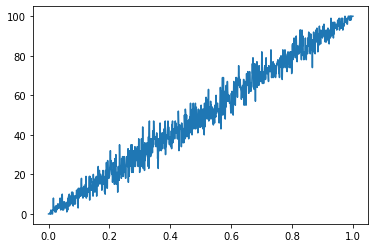

In [181]:
plt.plot(x,y)

In [28]:
simulation = []
for prob in prior:
    simulation.append(generative_model(100,prob))

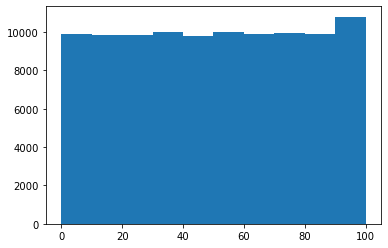

In [29]:
plt.hist(simulation);

In [30]:
truth = 14
posteriori = []
for n_vis in simulation:
    posteriori.append(n_vis == truth)

In [69]:
post = [prob for prob, res in zip(prior,posteriori) if res]

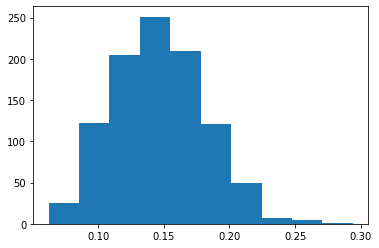

In [70]:
plt.hist(post);

In [71]:
post = pd.Series(post)

In [72]:
post.describe()

count    996.000000
mean       0.146372
std        0.034855
min        0.062292
25%        0.121034
50%        0.144710
75%        0.169148
max        0.293975
dtype: float64

In [76]:
mean = post.describe().loc["mean"]
rounded_post = post.round(2)
mode = rounded_post.mode()[0]

In [81]:
maxi, mini = post.max(),post.min()
bins = np.arange(mini,maxi,0.01)

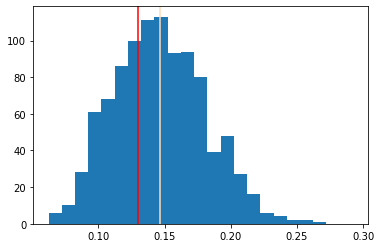

In [82]:
plt.hist(post, bins=bins)
plt.axvline(mean, color="peachpuff")
plt.axvline(mode, color="red");

[Colors Matplotlib accepts](https://www.w3schools.com/colors/colors_names.asp)

In [55]:
post.quantile(.9)

0.19279259728204584

In [56]:
post.quantile(.05),post.quantile(.95)

(0.0935104507641723, 0.20606236903389988)

In [90]:
mode

0.13

In [84]:
mle = len(rounded_post[rounded_post == mode]) / len(rounded_post)

In [85]:
mle

0.11546184738955824

In [89]:
rounded_post.value_counts().iloc[0] / rounded_post.shape[0]

0.11546184738955824

#### Extra, with distributions

In [182]:
from scipy.stats import binom

In [183]:
N = 100
p = mode
subscribers = binom(N,p)

In [197]:
k = np.arange(0,100,1)

In [198]:
P = subscribers.pmf(k)

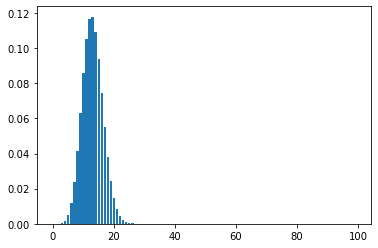

In [201]:
plt.bar(k,P);

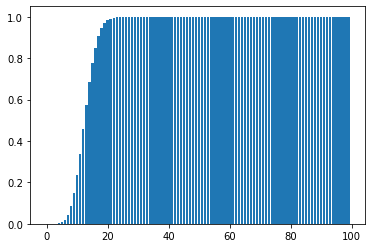

In [202]:
cdf = subscribers.cdf(k)
plt.bar(k,cdf);

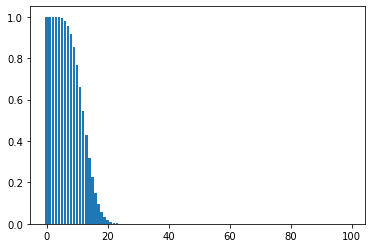

In [206]:
plt.bar(k,binom.cdf(k[::-1],N,(1-mode)));